# Marbles in a bag 
This Jupyter notebook serves as a collection of all the code used to generate music in the piece "Marbles in a bag".
The code can be experimented with to create different examples.

## Generating probability vectors and transition matrices.
The piece is based on randomly (or semi-randomly) generated probabilities, which the computer takes as input and ouputs material based on the given probabilities. In addition, Markov chains are used as an alternative method of creating materials.

The following will generate a probability vector and save it as a `.csv` file in the same directory. Note that due to rounding, what appears as output here may not sum appropriately to 1, however, the `.csv` file should be accurate. In "Marbles in a bag", the probabilities given by the program were rounded and adjusted to less digits.

(FIX THE PRINT MATRIX FUNCTION)

In [79]:
from numpy import random, savetxt

#generate a random n x 1 vector
v = random.rand(10,1)

#normalize the vector column
p = v/v.sum(axis=0)[:,None]

#save the matrix as a .csv file
savetxt("probability-vector.csv", p, delimiter=",")

### output the matrix for jupyter ###
from definitions import print_matrix
print_matrix(p)

<IPython.core.display.Math object>

The following will generate a right stochastic matrix and save it as a `.csv` file in the same directory.

In [19]:
from numpy import random, savetxt

#generate a random n x n matrix
M = random.rand(4,4)

#normalize the matrix rows
S = M/M.sum(axis=1)[:,None]

#save the matrix as a .csv file
savetxt("stochastic-matrix.csv", S, delimiter=",")

### output the matrix for jupyter ###
from definitions import print_matrix
print_matrix(S)

<IPython.core.display.Math object>

## Generating pitch material using probability vectors.
Now that a probability vector is defined, pitch material can be generated using the probabilites.

When changing pitch information, type the pitches in the same order top down as the probability vector. For accidentals, # indicates sharp, and - indicates flat. The 4 indictates that it is in the fourth octave.

In [1]:
import numpy as np
from music21 import stream, note

#import probability vector
pr = np.loadtxt(open("probability-vector.csv", "rb"), delimiter=",")

#define possible pitches
pitches = ['C', 'C#', 'D', 'D#', 'E',  'F', 'F#', 'G', 'G#', 'A']

#function
out = np.random.choice(pitches, 20, p=pr)
print(out)

#start a collection of pitches
s = stream.Stream()

#insert the generated pitches into the melody
for i in range(len(out)):
    s.insert(i, note.Note(out[i] + '4'))

#print the collection of pitches
s.show()
s.show('midi')

FileNotFoundError: [Errno 2] No such file or directory: 'probability-vector.csv'

## Generating rhythmic material using probability vectors.
For "Marbles in a bag", 24 rhythms were defined (and for ease of programming, indexed with numbers) in the following diagram. Again, using a probability vector of dimension 24, randomly generated rhythms were output by the program.

![](rhythms.svg)

The following will generate a number of rhythms on G4.

In [61]:
import numpy as np
from music21 import stream, note

#import probability vector
pr = np.loadtxt(open("probability-vector.csv", "rb"), delimiter=",")

#define possible rhythms
rhythms = np.arange(1, 11)

#function
out = np.random.choice(rhythms, 10, p=pr)
print(out)

[8 8 6 5 3 6 7 5 7 8]


Next, we combine the two. (FIX THIS)

In [70]:
import numpy as np
from music21 import stream, note

#import probability vector
pr = np.loadtxt(open("probability-vector.csv", "rb"), delimiter=",")

#define possible pitches
pitches = ['C', 'C#', 'D', 'D#', 'E',  'F', 'F#', 'G', 'G#', 'A']

#pitches function
outa = np.random.choice(pitches, 20, p=pr)

#define possible rhythms
rhythms = np.arange(1, 11)

#rhythms function
outb = np.random.choice(rhythms, 20, p=pr)
print(outb)
summy = np.cumsum(outb)
print(summy)

notia = []

#list of notes
for i in range(len(outa)):
    notia[i] = note.Note(outa[i] + '4')
    notia[i].duration.quarterLength = outb[i]
print(notia[i])

#start a collection of pitches
s = stream.Stream()
d = duration.Duration()

#insert the generated pitches/rhythms into the melody
for i in range(len(outa)):
    s.insert(summy[i]-outb[i], note.Note(outa[i] + '4', quarterLength = outb[i]))

#print the collection of pitches/rhythms
s.show()
s.show('midi')

[5 1 4 7 8 1 6 8 5 1 3 7 1 5 6 5 5 7 1 5]
[ 5  6 10 17 25 26 32 40 45 46 49 56 57 62 68 73 78 85 86 91]


IndexError: list assignment index out of range

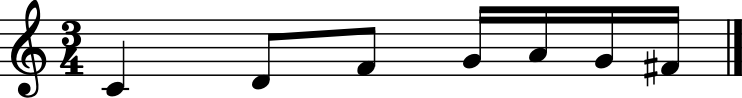

In [4]:
from music21 import *
converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#").show()

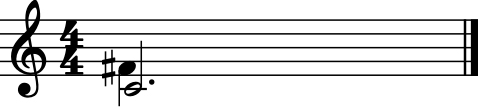

In [76]:
from music21 import *
note1 = note.Note("C4")
note1.duration.quarterLength = 3.0
note2 = note.Note("F#4")
note2.duration.quarterLength
notia = [note1, note2]
s = stream.Stream(notia)
s.show()
s.show('midi')

[55. 54. 52. 65. 57. 64. 69. 69. 61. 61. 69. 55. 68. 61. 69. 57. 60. 72.
 62. 69. 69. 66. 73. 69. 64. 60. 62. 71. 62. 74. 66. 59. 59. 65. 62. 69.
 69. 66. 62. 66. 72. 62. 66. 55. 62. 69. 62. 55. 57. 65. 65. 72. 62. 72.
 57. 62. 62. 59. 55. 71. 71. 74. 66. 64. 55. 54. 72. 67. 64. 67. 66. 69.
 62. 66. 64. 68. 71. 57. 71. 72. 72. 60. 66. 71. 68. 72. 62. 69. 71. 71.
 59. 57. 59. 69. 72. 64. 70. 64. 67. 67. 72. 66. 62. 64. 59. 59. 64. 72.
 64. 67. 71. 69. 72. 62. 66. 59. 71. 67. 59. 67. 64. 67. 68. 64. 64. 69.
 64. 59. 71. 72. 67. 57. 67. 67. 69. 74. 67. 62. 64. 62. 67. 66. 67. 59.
 64. 55. 67. 71. 71. 66. 50. 67. 66. 69. 71. 69. 67. 74. 72. 69. 52. 66.
 64. 66. 55. 67. 66. 74. 64. 63. 57. 62. 69. 64. 66. 62. 66. 54. 64. 69.
 61. 66. 62. 62. 66. 48. 62. 67. 64. 69. 59. 59. 64. 60. 66. 69. 67. 57.
 64. 61. 62. 66. 55. 62. 66. 72. 67. 67. 69. 50. 62. 71. 62. 66. 66. 64.
 64. 67. 66. 59. 66. 71. 71. 69. 64. 71. 71. 49. 67. 62. 74. 62. 62. 64.
 50. 69. 62. 60. 72. 66. 66. 61. 64. 66. 67. 62. 67

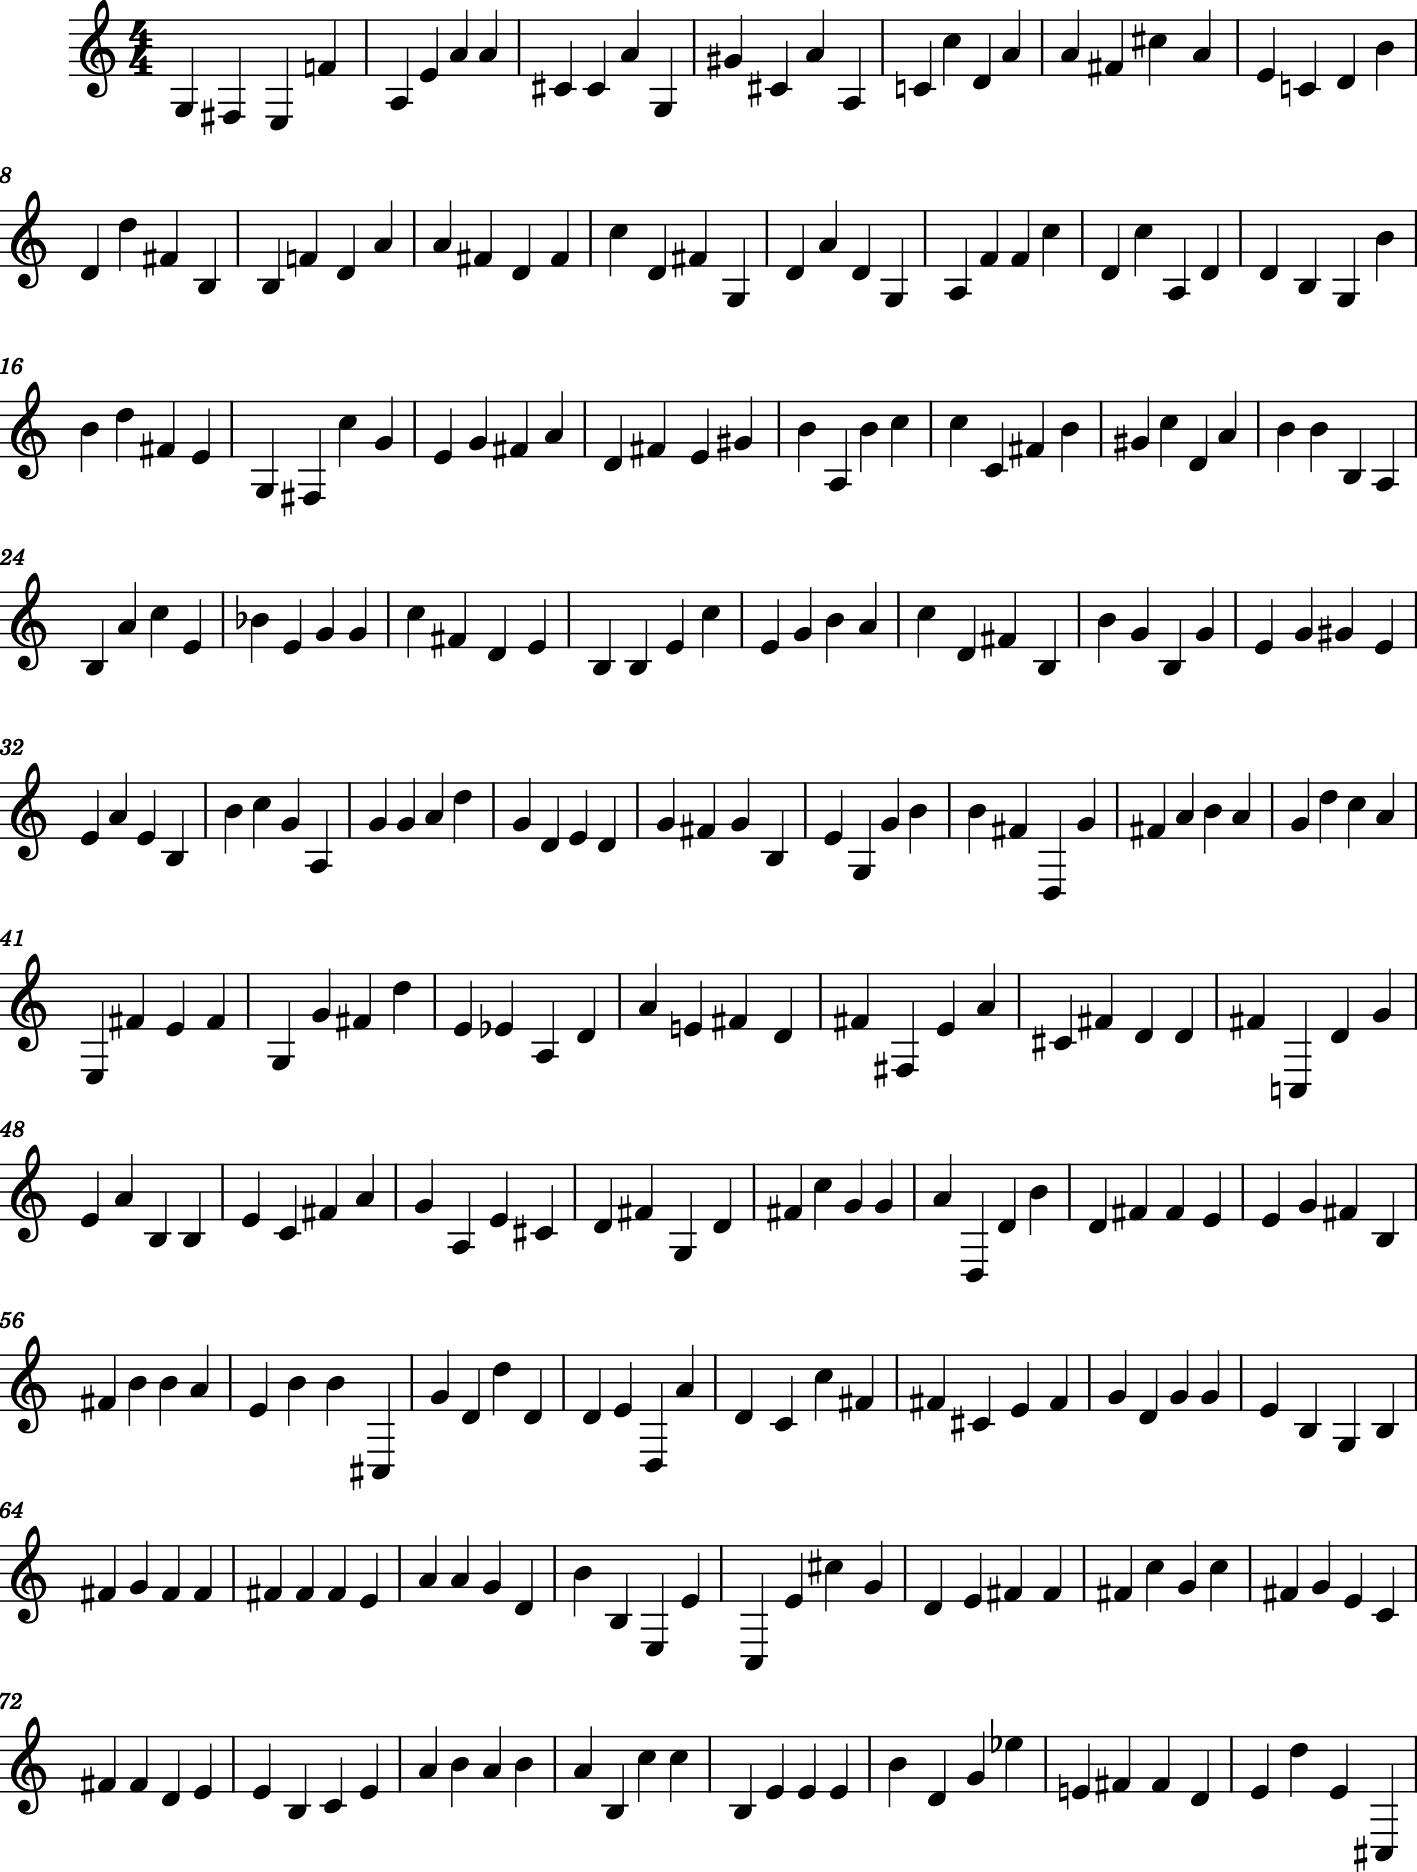

In [13]:
#other test
import numpy as np
from music21 import stream, note
s = stream.Stream()

news = np.loadtxt(open("prelude-test.csv", "rb"), delimiter=",", encoding='utf-8-sig')
print(news)
for x in news:
    n = note.Note()
    n.pitch.midi = x
    s.append(n)
s.show()
s.show('midi')